### Seaborn
- matplotlib를 기반으로 만들어진 시각화 라이브러리
- 통계 시각화에 특화되어 있음

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프를 위한 기본 설정
# 폰트 설정
#plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
# 그래프의 크기
plt.rcParams['figure.figsize'] = 12, 6
# 글자 크기
plt.rcParams['font.size'] = 14
# 폰트 설정시 마이너스 기호가 깨지는 것을 방지한다.
plt.rcParams['axes.unicode_minus'] = False

### 1차원 분포 플롯
- 데이터 분포를 확인하기 위해서는 산점도(scatter)를 사용함
- 산점도 x축과 y축이 지정되어야 하기 때문에 1차원 데이터는 표현할 수 없음
- 이에 seaborn에서는 1차원 데이터의 분포를 확인할 수 있는 것을 제공

In [2]:
iris = pd.read_csv('data/iris.csv')
iris.columns=['꽃받침길이', '꽃받침너비', '꽃잎길이', '꽃잎너비', '품종']
iris

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


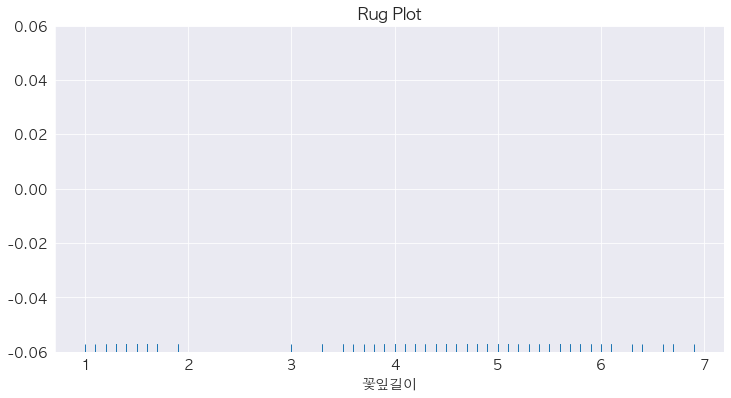

In [3]:
# Rug Plot
# 1차원 데이터에 저장되어 있는 값들의 종류를 확인할 수 있음
# 각 값들이 얼마나 저장되어 있는지는 확인할 수 없음
sns.rugplot(iris['꽃잎길이'])
plt.title('Rug Plot')
plt.show()

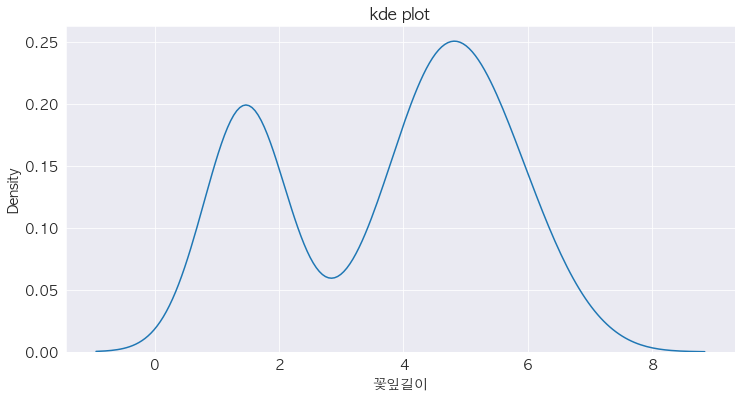

In [4]:
# kde: 히스토그램은 각 구간별 양을 구해 막대 그래프로 보여 주지만 kde는
# 각 값의 밀도(비율)을 구해 선으로 그러줌
# 패턴을 보는 것은 둘 다 동일하지만 하나의 좌표평면에 다수의 히스토그램을 그리면
# 중첩되는 부분이 보이지 않기 때문에 kde로 표현
sns.kdeplot(iris['꽃잎길이'])
plt.title('kde plot')
plt.show()

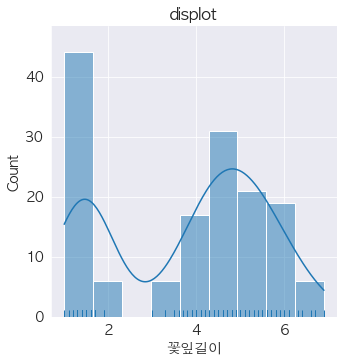

In [5]:
# displot: 히스토그램, rug, kde를 모두 보여줄 수 있음
sns.displot(iris['꽃잎길이'], kde=True, rug=True)
plt.title('displot')
plt.show()

### 카운트 플롯
- 특정 컬럼의 데이터 개수를 막대 그래프로 표현함
- 특정 컬럼의 데이터의 각 종류별로 몇개씩 저장되어 있는지 확인할 수 있음
- hue: 결과 데이터 컬럼을 지정함. 하나의 막대가 hue에 지정된 컬럼을 기준으로 나눠짐

In [6]:
sns.__version__

'0.12.1'

In [7]:
!pip install --upgrade seaborn

In [8]:
df100 = pd.read_csv('data/train.csv')
df100

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


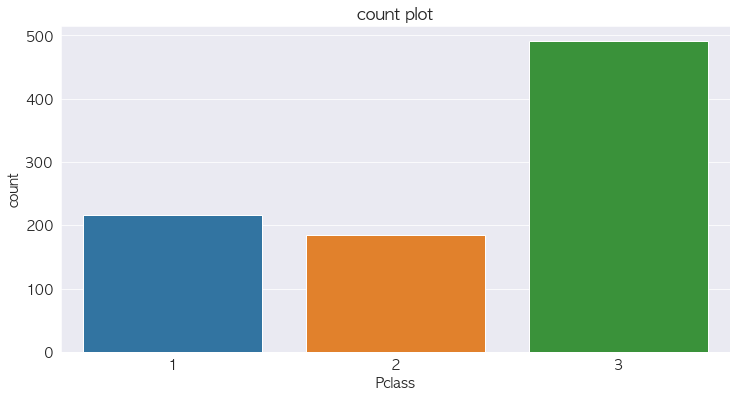

In [9]:
# data: 데이터프레임
# x: 사용할 컬럼이름
sns.countplot(data=df100, x='Pclass')
plt.title('count plot')
plt.show()

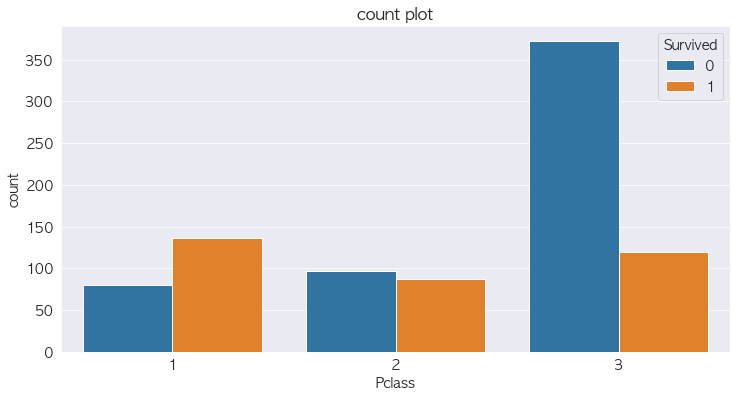

In [10]:
# hue: 각 막대를 나눌 기준 컬럼
sns.countplot(data=df100, x='Pclass', hue='Survived')
plt.title('count plot')
plt.show()

### 2차원 실수형 데이터

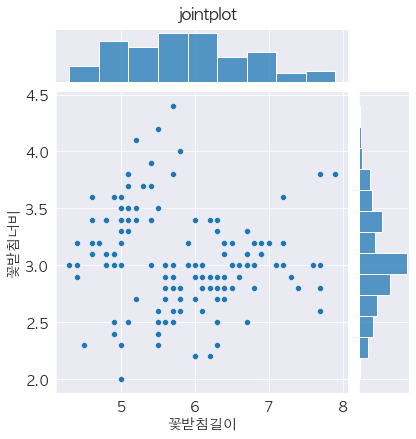

In [11]:
# jointplt: 산점도와 히스토그램을 같이 표현
sns.jointplot(data=iris, x ='꽃받침길이', y = '꽃받침너비')
plt.suptitle('jointplot', y = 1.02)
plt.show()

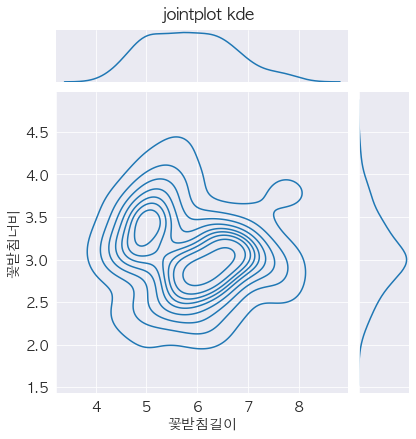

In [12]:
# kind에 kde를 넣어주면 kde 밀도 그래프로 표현해 준다.
sns.jointplot(data=iris, x ='꽃받침길이', y='꽃받침너비', kind='kde')
plt.suptitle('jointplot kde', y=1.02)
plt.show()

### PairPlot
- 산점도의 경우에는 2차원 데이터, 즉 컬럼 두개를 지정하여 표현함
- 만약 데이터프레임의 컬럼의 개수가 다수의 경우 산점도를 그리려면 각 컬럼의 조합 하나 하나를 모두 그려줘야 함
- 이것을 해주는 것이 PairPlot임

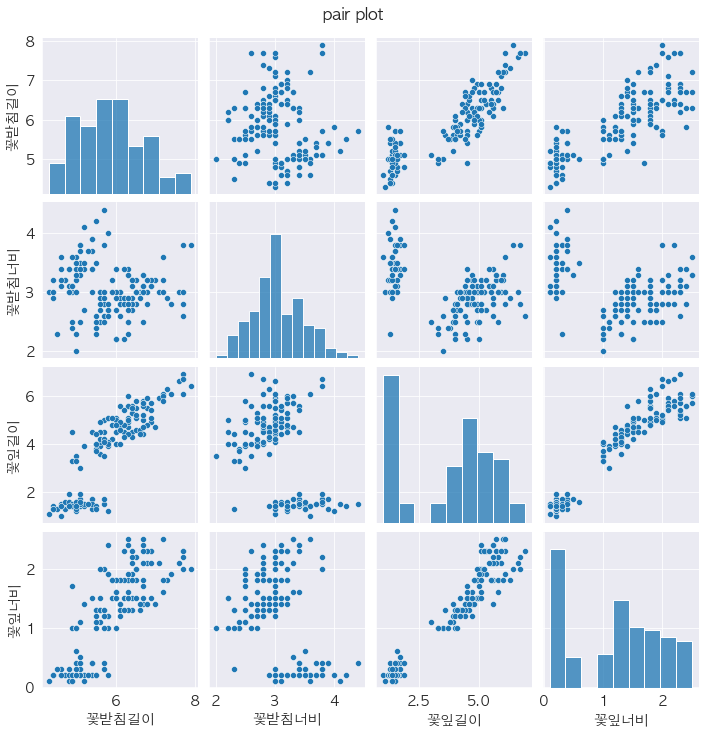

In [13]:
# 다른 컬럼의 조합에서는 산점도를 그려주고 같은 컬럼의 조합에서는
# 해당 컬럼의 히스토그램을 그려줌
sns.pairplot(iris)
plt.suptitle('pair plot', y=1.02)
plt.show()

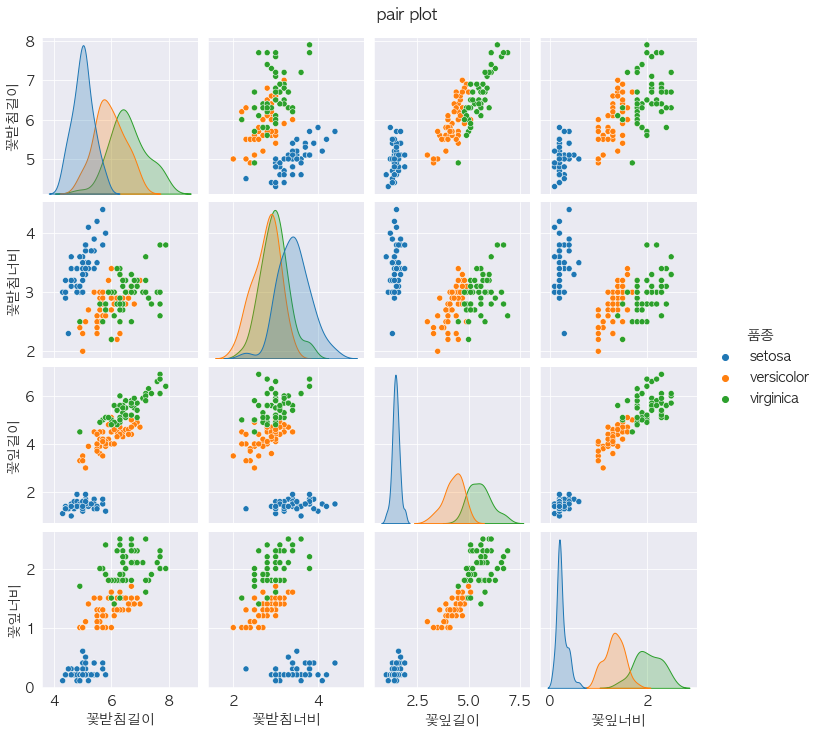

In [14]:
# hue에 컬럼을 지정하면 서로 다른 컬럼의 조합에서는 hue에 지정된 컬럼의 값으로 나눠 산점도를 그려주고
# 같은 컬럼의 조합에서는 hue에 지정된 컬럼의 값으로 나눠 kde 그래프를 그려줌
sns.pairplot(iris, hue='품종')
plt.suptitle('pair plot', y=1.02)
plt.show()

### Heatmap
- 주어진 데이터프레임의 값을 보고 큰 값은 밝게, 작은 값은 어둡게 표현하는 그래프
- 통계에 필요한 값을 직접 구해야 함
- 각 컬럼별 상관관계 계수를 시각화할 때 사용함

In [15]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [16]:
# pivot 테이블을 생성함
# 3개의 컬럼을 지정함
# 첫번째 컬럼은 y축으로, 두번째 컬럼은 x측으로, 세번째 컬럼은 값으로 사용함
df = flights.pivot('month', 'year', 'passengers')
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


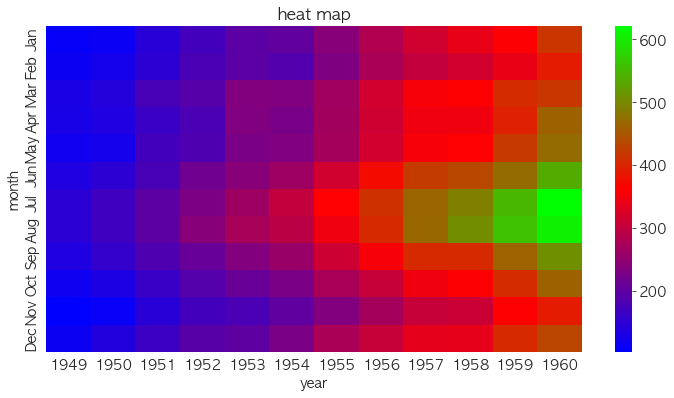

In [17]:
# cmap: 컬러 팔레트 지정
# 일단 아무 문자열이나 넣어서 발생하는 오류 메시지 마지막에
# 사용할 수 있는 값 문자열을 확인할 수 있음
sns.heatmap(df, cmap='brg')
plt.title('heat map')
plt.show()

In [18]:
# 상관계수 계산
a1 = iris.corr()
a1

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비
꽃받침길이,1.000000,-0.117570,0.871754,0.817941
꽃받침너비,-0.117570,1.000000,-0.428440,-0.366126
꽃잎길이,0.871754,-0.428440,1.000000,0.962865
꽃잎너비,0.817941,-0.366126,0.962865,1.000000


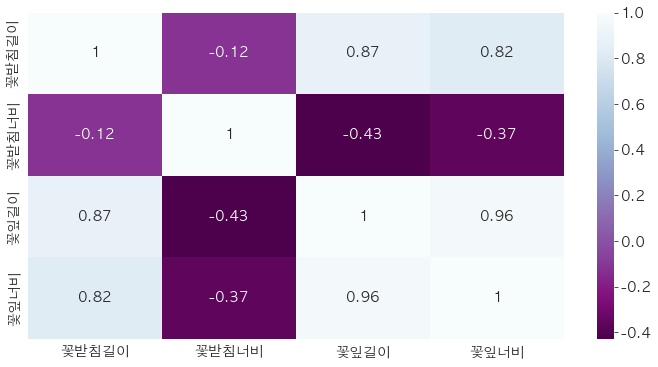

In [19]:
# annot: True를 주면 값을 표시해 줌
sns.heatmap(a1, cmap='BuPu_r', annot=True)
plt.show()